# Modeling Tsunami Potential From Global Seismic Patterns in Earthquakes

## Imports

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

## Function for Summary Information

In [142]:
# function for summaries, reports, and confusion matrix
def summarize_performance(name, y_true, y_pred, y_score=None):
    print(f"\n=== {name} ===")
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 score : {f1:.4f}")

    if y_score is not None:
        try:
            roc = roc_auc_score(y_true, y_score)
            print(f"ROC-AUC  : {roc:.4f}")
        except ValueError:
            print("ROC-AUC  : could not be computed (need both classes present).")

    print("\nClassification report:\n", classification_report(y_true, y_pred))

    # Confusion matrix (numeric)
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion matrix:\n", cm)

## Data Pre-Processing

In [143]:
df = pd.read_csv('earthquake_data_tsunami.csv')
df.head(10)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.5960,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.7380,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.3460,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.1290,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.2780,2022,11,1
5,7.0,4,3,755,142,4.578,26.0,660.000,-26.0442,178.3810,2022,11,1
6,6.8,1,3,711,136,4.678,22.0,630.379,-25.9678,178.3630,2022,11,1
7,6.7,7,6,797,145,1.151,37.0,20.000,7.6712,-82.3396,2022,10,1
8,6.8,8,7,1179,175,2.137,92.0,20.000,18.3300,-102.9130,2022,9,1
9,7.6,9,8,1799,271,1.153,69.0,26.943,18.3667,-103.2520,2022,9,1


In [144]:
# Data exploration
print(df.info())
print(df.describe())

# Prepare features and target
X = df.drop(columns=['tsunami','Year','Month'], axis=1)  # Features
y = df['tsunami']  # Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB
None
        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939

In [145]:
print(X.head())

print(y.head())

# Split data into training and testing sets
# 30% test, 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278
0    1
1    0
2    1
3    1
4    1
Name: tsunami, dtype: int64


## Random Forest Classification

In [146]:
# Create and train Random Forest model
# processing in parallel
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



=== Random Forest Classifier ===
Accuracy : 0.8723
Precision: 0.8252
Recall   : 0.8763
F1 score : 0.8500
ROC-AUC  : 0.9412

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       138
           1       0.83      0.88      0.85        97

    accuracy                           0.87       235
   macro avg       0.87      0.87      0.87       235
weighted avg       0.87      0.87      0.87       235


Confusion matrix:
 [[120  18]
 [ 12  85]]

Top Features:
      Feature  Importance
5       dmin    0.274198
4        nst    0.204124
9  longitude    0.166245
8   latitude    0.092360
6        gap    0.063416
7      depth    0.057511
3        sig    0.054070
1        cdi    0.031206
0  magnitude    0.030299
2        mmi    0.026571


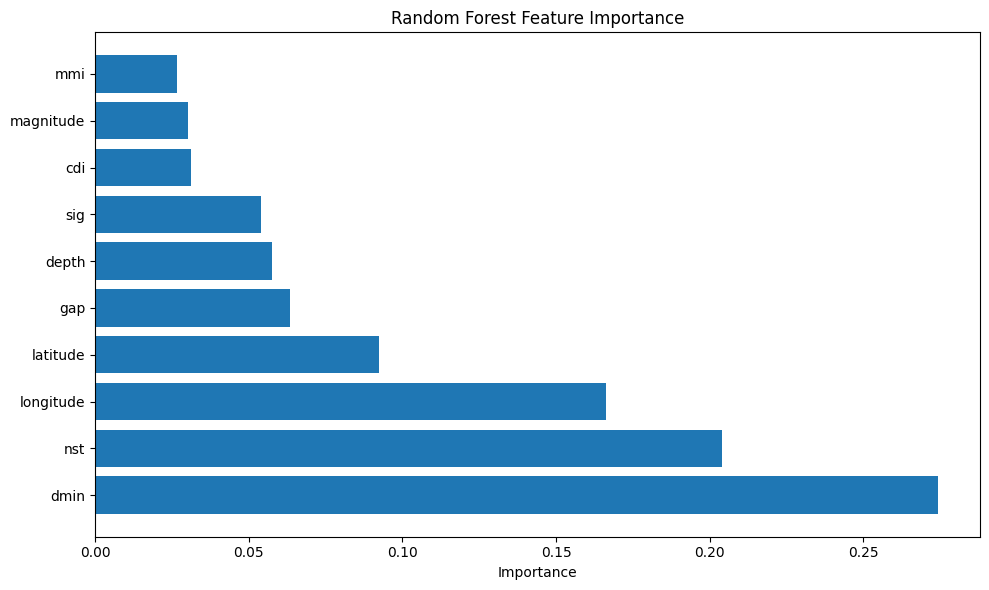

In [147]:
y_pred = rf_model.predict(X_test)
y_score = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Evaluate model
summarize_performance("Random Forest Classifier", y_test, y_pred, y_score)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop Features:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

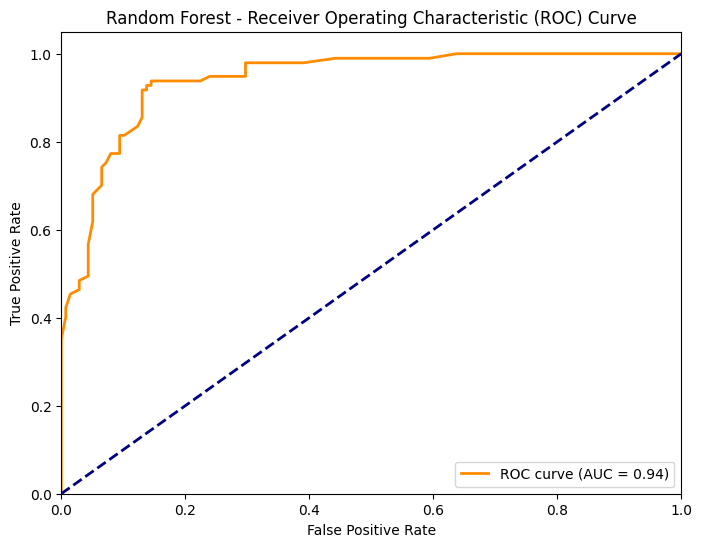

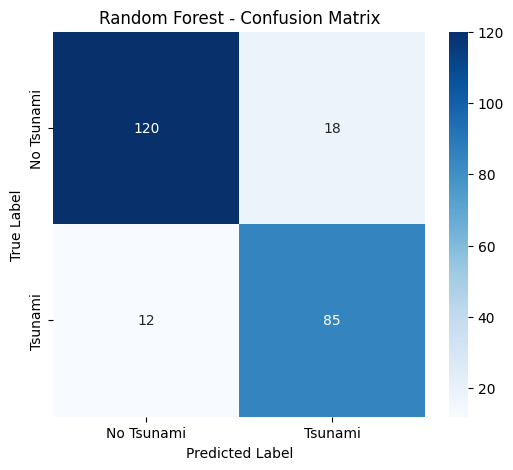

In [148]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Tsunami', 'Tsunami'],
            yticklabels=['No Tsunami', 'Tsunami'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## ANN

In [ ]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_shape = (X_train.shape[1],)

# Define the model architecture for binary classification
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(32, activation='relu'))  # Optional: added another hidden layer
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=32,  # Smaller batch size often works better
                    epochs=50,      # More epochs for better training
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

c:\Users\Humna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5686 - loss: 0.6768 - val_accuracy: 0.6936 - val_loss: 0.6170
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7459 - loss: 0.5565 - val_accuracy: 0.7319 - val_loss: 0.5496
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8044 - loss: 0.4942 - val_accuracy: 0.7830 - val_loss: 0.5080
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8172 - loss: 0.4533 - val_accuracy: 0.7957 - val_loss: 0.4906
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8300 - loss: 0.4295 - val_accuracy: 0.8043 - val_loss: 0.4792
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8336 - loss: 0.4142 - val_accuracy: 0.8170 - val_loss: 0.4732
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8483 - loss: 0.4045 - val_accuracy: 0.8128 - val_loss: 0.4710
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8464 - loss: 0.3974 - val_accuracy: 0.8170 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== ANN Classifier ===
Accuracy : 0.8426
Precision: 0.8000
Recall   : 0.8247
F1 score : 0.8122
ROC-AUC  : 0.9036

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       138
           1       0.80      0.82      0.81        97

    accuracy                           0.84       235
   macro avg       0.84      0.84      0.84       235
weighted avg       0.84      0.84      0.84       235


Confusion matrix:
 [[118  20]
 [ 17  80]]


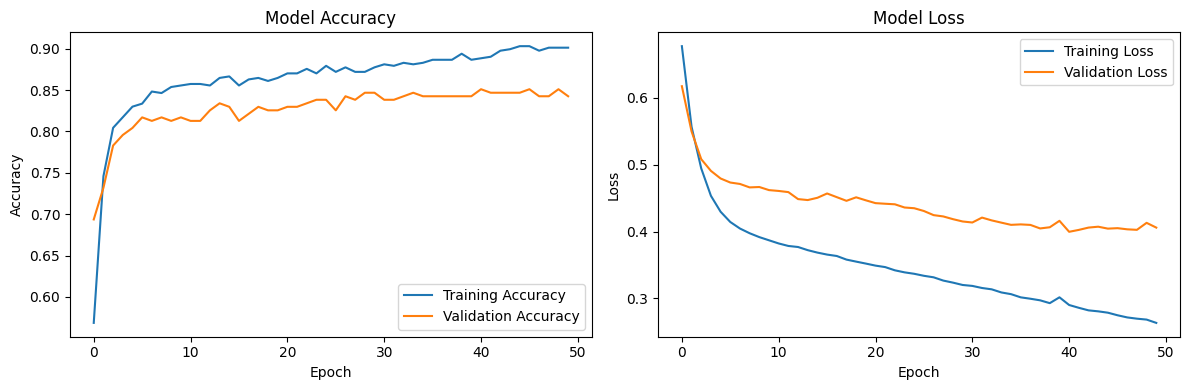

In [154]:
# Get predictions from the ANN
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the ANN model
summarize_performance("ANN Classifier", y_test, y_pred, y_pred_prob.flatten())

# Optional: Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

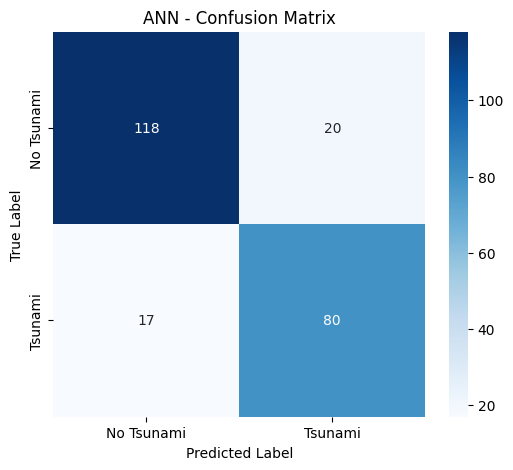

In [155]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Tsunami', 'Tsunami'],
            yticklabels=['No Tsunami', 'Tsunami'])
plt.title('ANN - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()